In [29]:
import numpy as np
import torch

In [ ]:
Q

In [25]:
def compute_qkv_matrices(x1, x2, x3, WQ, WK, WV):
    """Computes the Q, K, and V matrices for the given input vectors and weight matrices."""
    # Compute Q, K, V matrices
    Q = np.array([np.dot(x1, WQ), np.dot(x2, WQ), np.dot(x3, WQ)])
    K = np.array([np.dot(x1, WK), np.dot(x2, WK), np.dot(x3, WK)])
    V = np.array([np.dot(x1, WV), np.dot(x2, WV), np.dot(x3, WV)])
    
    return Q, K, V

def softmax(x):
    """Compute softmax values for each set of scores in x."""
    e_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return e_x / e_x.sum(axis=1, keepdims=True)

def calculate_attention_scores(Q, K):
    """Calculate the attention scores."""
    # Dimension of the key vectors
    dim_k = K.shape[1]
    # Dot product of Q and K^T and scale by sqrt(dim_k)
    scores = np.matmul(Q, K.T) / np.sqrt(dim_k)
    return scores

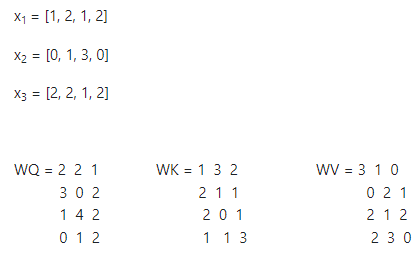


In [26]:
# Input vectors
x1 = np.array([1, 2, 1, 2])
x2 = np.array([0, 1, 3, 0])
x3 = np.array([2, 2, 1, 2])

# Weight matrices
WQ = np.array([[2, 2, 1], [3, 0, 2], [1, 4, 2], [0, 1, 2]])
WK = np.array([[1, 3, 2], [2, 1, 1], [2, 0, 1], [1, 1, 3]])
WV = np.array([[3, 1, 0], [0, 2, 1], [2, 1, 2], [2, 3, 0]])

In [27]:
# Compute Q, K, and V matrices
Q, K, V = compute_qkv_matrices(x1, x2, x3, WQ, WK, WV)

print("Q matrix:\n", Q)
print("\nK matrix:\n", K)
print("\nV matrix:\n", V)

Q matrix:
 [[ 9  8 11]
 [ 6 12  8]
 [11 10 12]]

K matrix:
 [[ 9  7 11]
 [ 8  1  4]
 [10 10 13]]

V matrix:
 [[ 9 12  4]
 [ 6  5  7]
 [12 13  4]]


In [28]:
attention_scores = calculate_attention_scores(Q, K)
attention_scores = attention_scores.round(decimals=2, out=None)
# Step 3: Apply Softmax
alpha = softmax(attention_scores)

print("Attention Scores:\n", attention_scores)
print("\nAlpha values after softmax:\n", alpha)

Attention Scores:
 [[148.96  71.59 180.71]
 [130.48  53.12 163.97]
 [173.78  84.29 211.31]]

Alpha values after softmax:
 [[1.62611104e-14 4.07179716e-48 1.00000000e+00]
 [2.85415662e-15 7.21866156e-49 1.00000000e+00]
 [5.02259424e-17 6.85353932e-56 1.00000000e+00]]


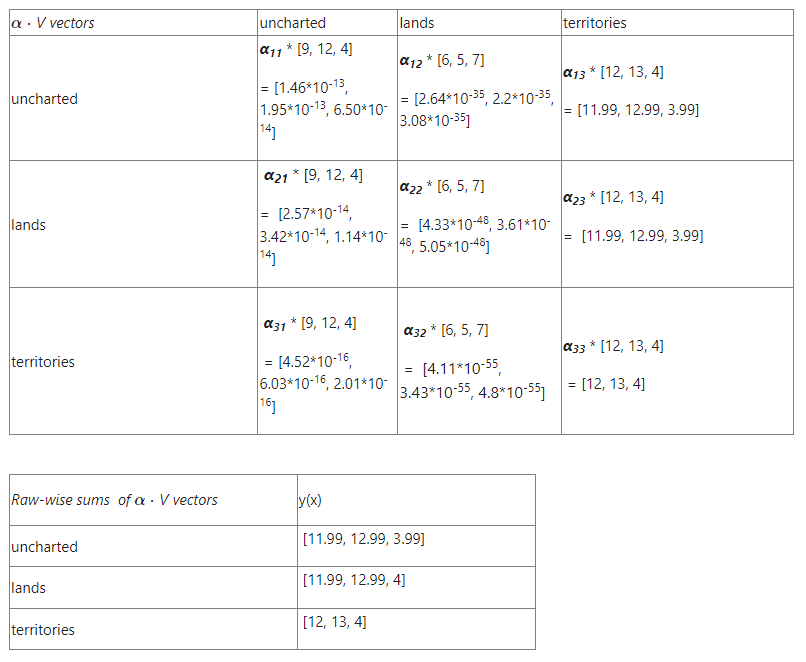

not sure


In [32]:
import torch
import math
q = torch.tensor([-11,13,2,-6,18])
k = torch.tensor([-4,-20,10,9,-18])
v = torch.tensor([-2,19,14,-20,-10])


sftmx = torch.nn.Softmax(dim=0)

print(sftmx(torch.dot(q,k.T)/ math.sqrt(5)) * v)

q = torch.tensor([13,17,-9,-3,8])
k = torch.tensor([8,19,18,-18,8])
v = torch.tensor([17,-5,-4,15,-8])

sftmx = torch.nn.Softmax(dim=0)

print(sftmx(torch.dot(q,k.T)/ math.sqrt(5)) * v)

q = torch.tensor([15,0,-20,3,3])
k = torch.tensor([-4,-18,6,18,2])
v = torch.tensor([-11,4,6,-2,-6])

sftmx = torch.nn.Softmax(dim=0)

print(sftmx(torch.dot(q,k.T)/ math.sqrt(5)) * v)

tensor([ -2.,  19.,  14., -20., -10.])
tensor([17., -5., -4., 15., -8.])
tensor([-11.,   4.,   6.,  -2.,  -6.])
